In [445]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [515]:
data = pd.read_csv('titanic_classification.csv')

In [516]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [517]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [519]:
# Checking only the Textual values which did not appear in porevious cell
# data[~data.Cabin.notnull()] # 687 rows with no Cabin data
# data[~data.Embarked.notnull()] # 2 rows with no Embarked data
# data[~data.Ticket.notnull()] # No null data found
# data[~data.Sex.notnull()] # No null data found
# data[~data.Age.notnull()] # 177 rows with no Age data

In [450]:
data.drop(columns=['Name', 'PassengerId', 'Cabin'], inplace=True)

In [451]:
data.Sex = data.Sex.apply(lambda x :0 if x.lower()=='male' else 1) # 0 -> Male , 1 -> Female

In [452]:
data.Embarked.value_counts() # S, C, Q

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [453]:
embarked_labels = {'S': 1 , 'C': 2 , 'Q': 3}
data.Embarked = data.Embarked.apply(lambda x :embarked_labels[x] if not pd.isna(x) else 0)

In [454]:
data.Embarked.value_counts()

1    644
2    168
3     77
0      2
Name: Embarked, dtype: int64

In [455]:
ticket_labels = {k[0]:n for n,k in enumerate(data.Ticket.value_counts().items())}
data.Ticket = data.Ticket.apply(lambda x :ticket_labels[x])

Text(0, 0.5, '# of people')

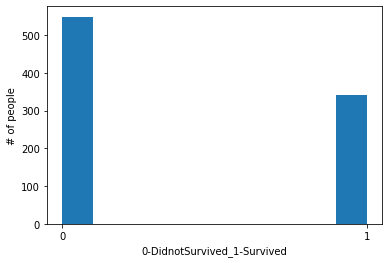

In [456]:
plt.hist(data.Survived)
plt.xticks([0,1])
plt.xlabel('0-DidnotSurvived_1-Survived')
plt.ylabel('# of people')

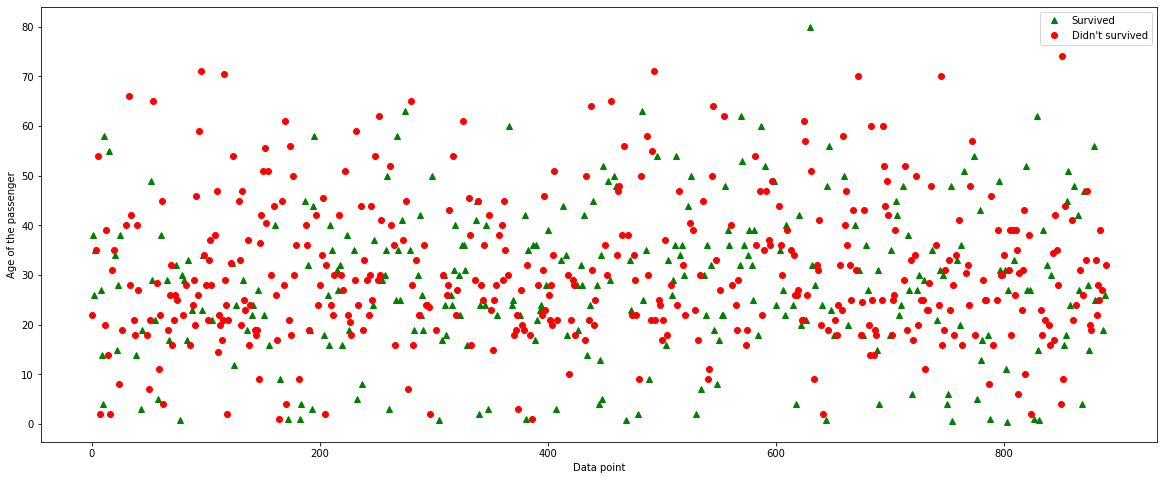

In [457]:
plt.figure(figsize=(20,8))
plt.plot(data[data.Survived == 1]['Age'],'g^', label='Survived')
plt.plot(data[data.Survived == 0]['Age'],'ro', label='Didn\'t survived')
plt.xlabel('Data point')
plt.ylabel('Age of the passenger')
plt.legend()

([<matplotlib.axis.XTick at 0x207b39b7580>,
 [Text(0, 0, ''), Text(0, 0, '')])

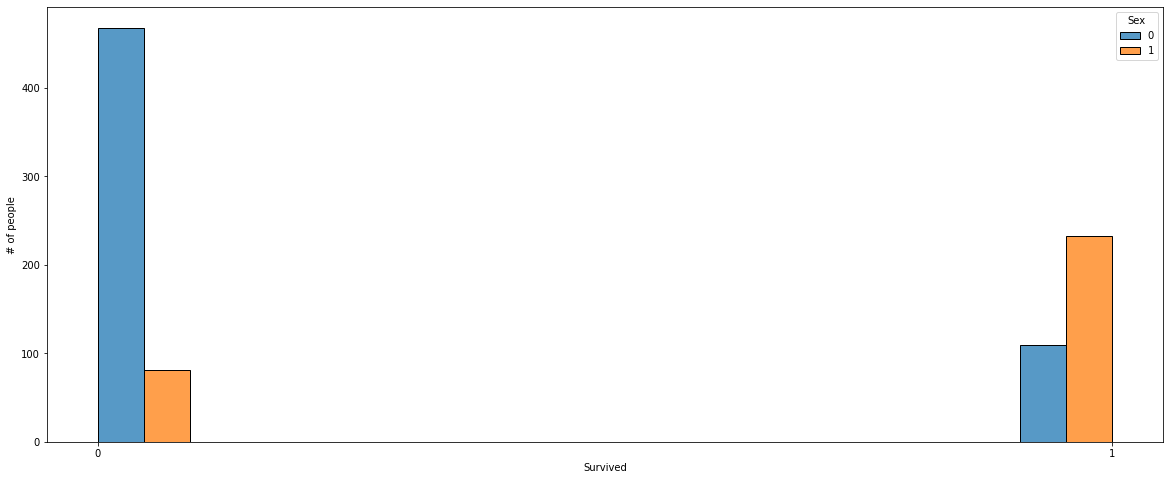

In [458]:
plt.figure(figsize=(20,8))
sns.histplot(multiple='dodge', x = 'Survived', data=data, hue='Sex')
plt.ylabel('# of people')
plt.xticks([0,1])

<AxesSubplot:xlabel='Survived', ylabel='Age'>

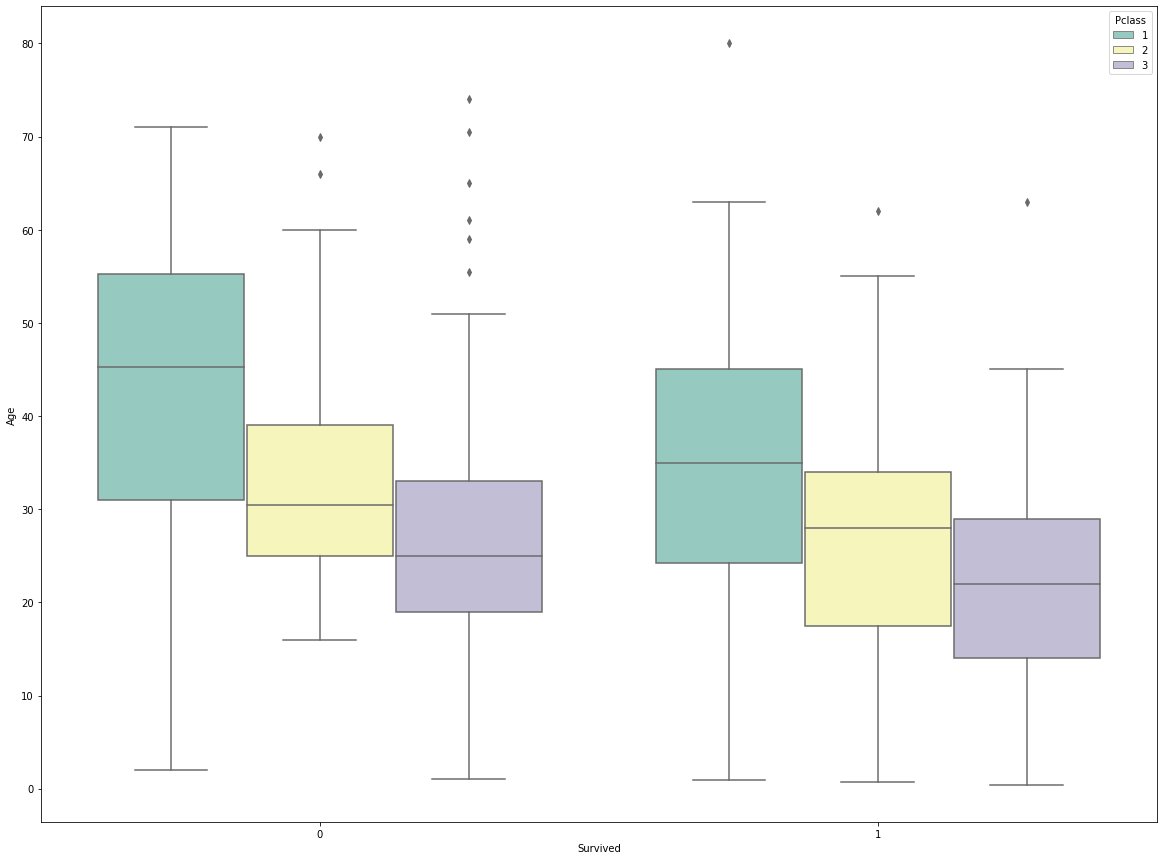

In [459]:
plt.figure(figsize=(20,15))
sns.boxplot(x='Survived',y='Age',hue='Pclass', data=data, palette="Set3")

<AxesSubplot:xlabel='Survived', ylabel='Age'>

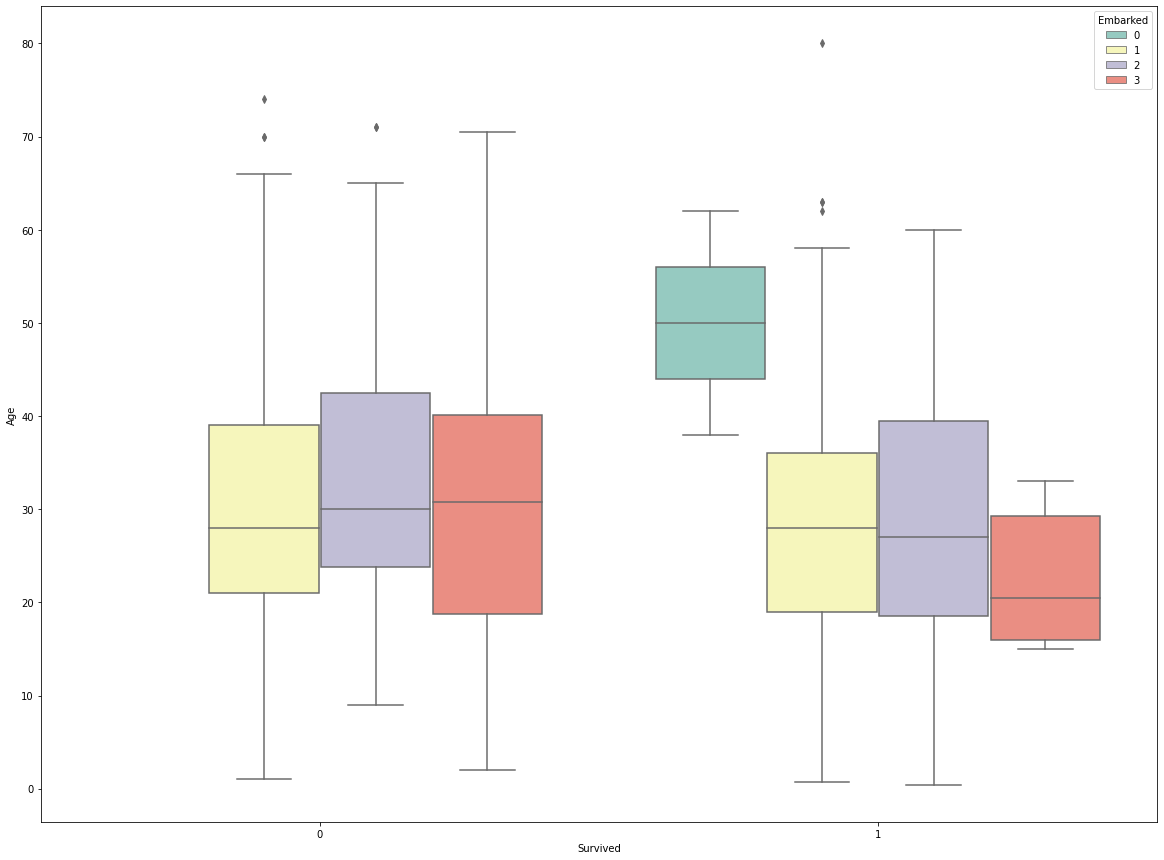

In [460]:
plt.figure(figsize=(20,15))
sns.boxplot(x='Survived', y='Age', hue='Embarked', data=data, palette="Set3") # Here 0 label is for Null values , ignore them

In [461]:
guess_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        guess_df = data[(data['Sex'] == i) & \
                              (data['Pclass'] == j+1)]['Age'].dropna()

        age_guess = guess_df.median()
        guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
        
for i in range(0, 2):
    for j in range(0, 3):
        data.loc[ (data.Age.isnull()) & (data.Sex == i) & (data.Pclass == j+1),\
                'Age'] = guess_ages[i,j]

data['Age'] = data['Age'].astype(int)

data.loc[data['Age'] <= 16, 'Age'] = 0
data.loc[(data['Age'] > 16) & (data['Age'] <= 32), 'Age'] = 1
data.loc[(data['Age'] > 32) & (data['Age'] <= 48), 'Age'] = 2
data.loc[(data['Age'] > 48) & (data['Age'] <= 64), 'Age'] = 3
data.loc[ data['Age'] > 64, 'Age'] = 4
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,0,1,1,0,162,7.2500,1
1,1,1,1,2,1,0,545,71.2833,2
2,1,3,1,1,0,0,489,7.9250,1
3,1,1,1,2,1,0,70,53.1000,1
4,0,3,0,2,0,0,490,8.0500,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,296,13.0000,1
887,1,1,1,1,0,0,297,30.0000,1
888,0,3,1,1,1,2,56,23.4500,1
889,1,1,0,1,0,0,298,30.0000,2


In [474]:
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[ data['Fare'] > 31, 'Fare'] = 3
data['Fare'] = data['Fare'].astype(int)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IsAlone
0,0,3,0,1,1,0,162,0,1,0
1,1,1,1,2,1,0,545,3,2,0
2,1,3,1,1,0,0,489,1,1,1
3,1,1,1,2,1,0,70,3,1,0
4,0,3,0,2,0,0,490,1,1,1
...,...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,296,1,1,1
887,1,1,1,1,0,0,297,2,1,1
888,0,3,1,1,1,2,56,2,1,0
889,1,1,0,1,0,0,298,2,2,1


In [475]:
data['IsAlone'] = 1
data.loc[((data.Parch == 0) & (data.SibSp == 0)), 'IsAlone'] = 1
data.loc[~((data.Parch == 0) & (data.SibSp == 0)), 'IsAlone'] = 0

([<matplotlib.axis.XTick at 0x207b4636f40>,
 [Text(0, 0, ''), Text(0, 0, '')])

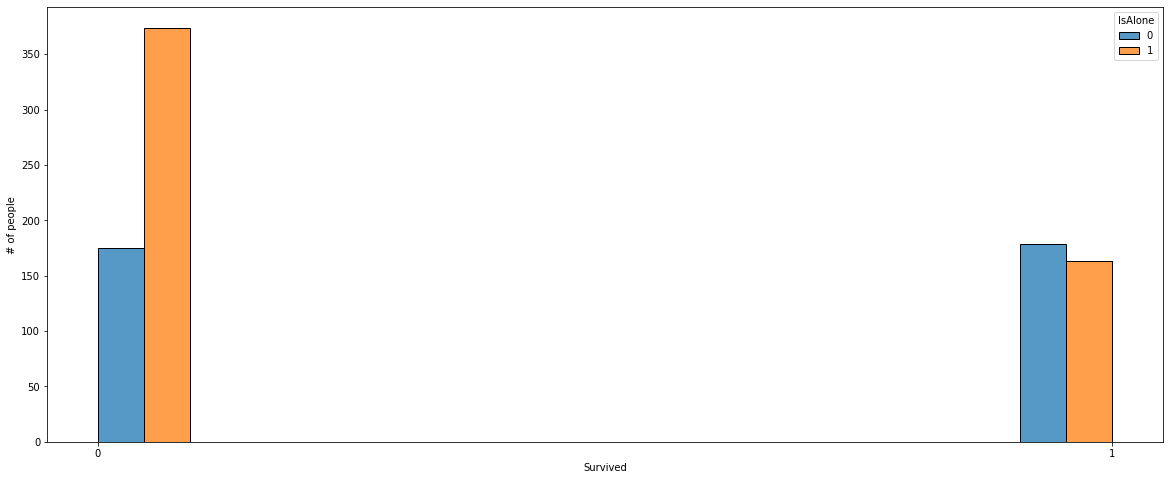

In [476]:
plt.figure(figsize=(20,8))
sns.histplot(multiple='dodge', x = 'Survived', data=data, hue='IsAlone')
plt.ylabel('# of people')
plt.xticks([0,1])

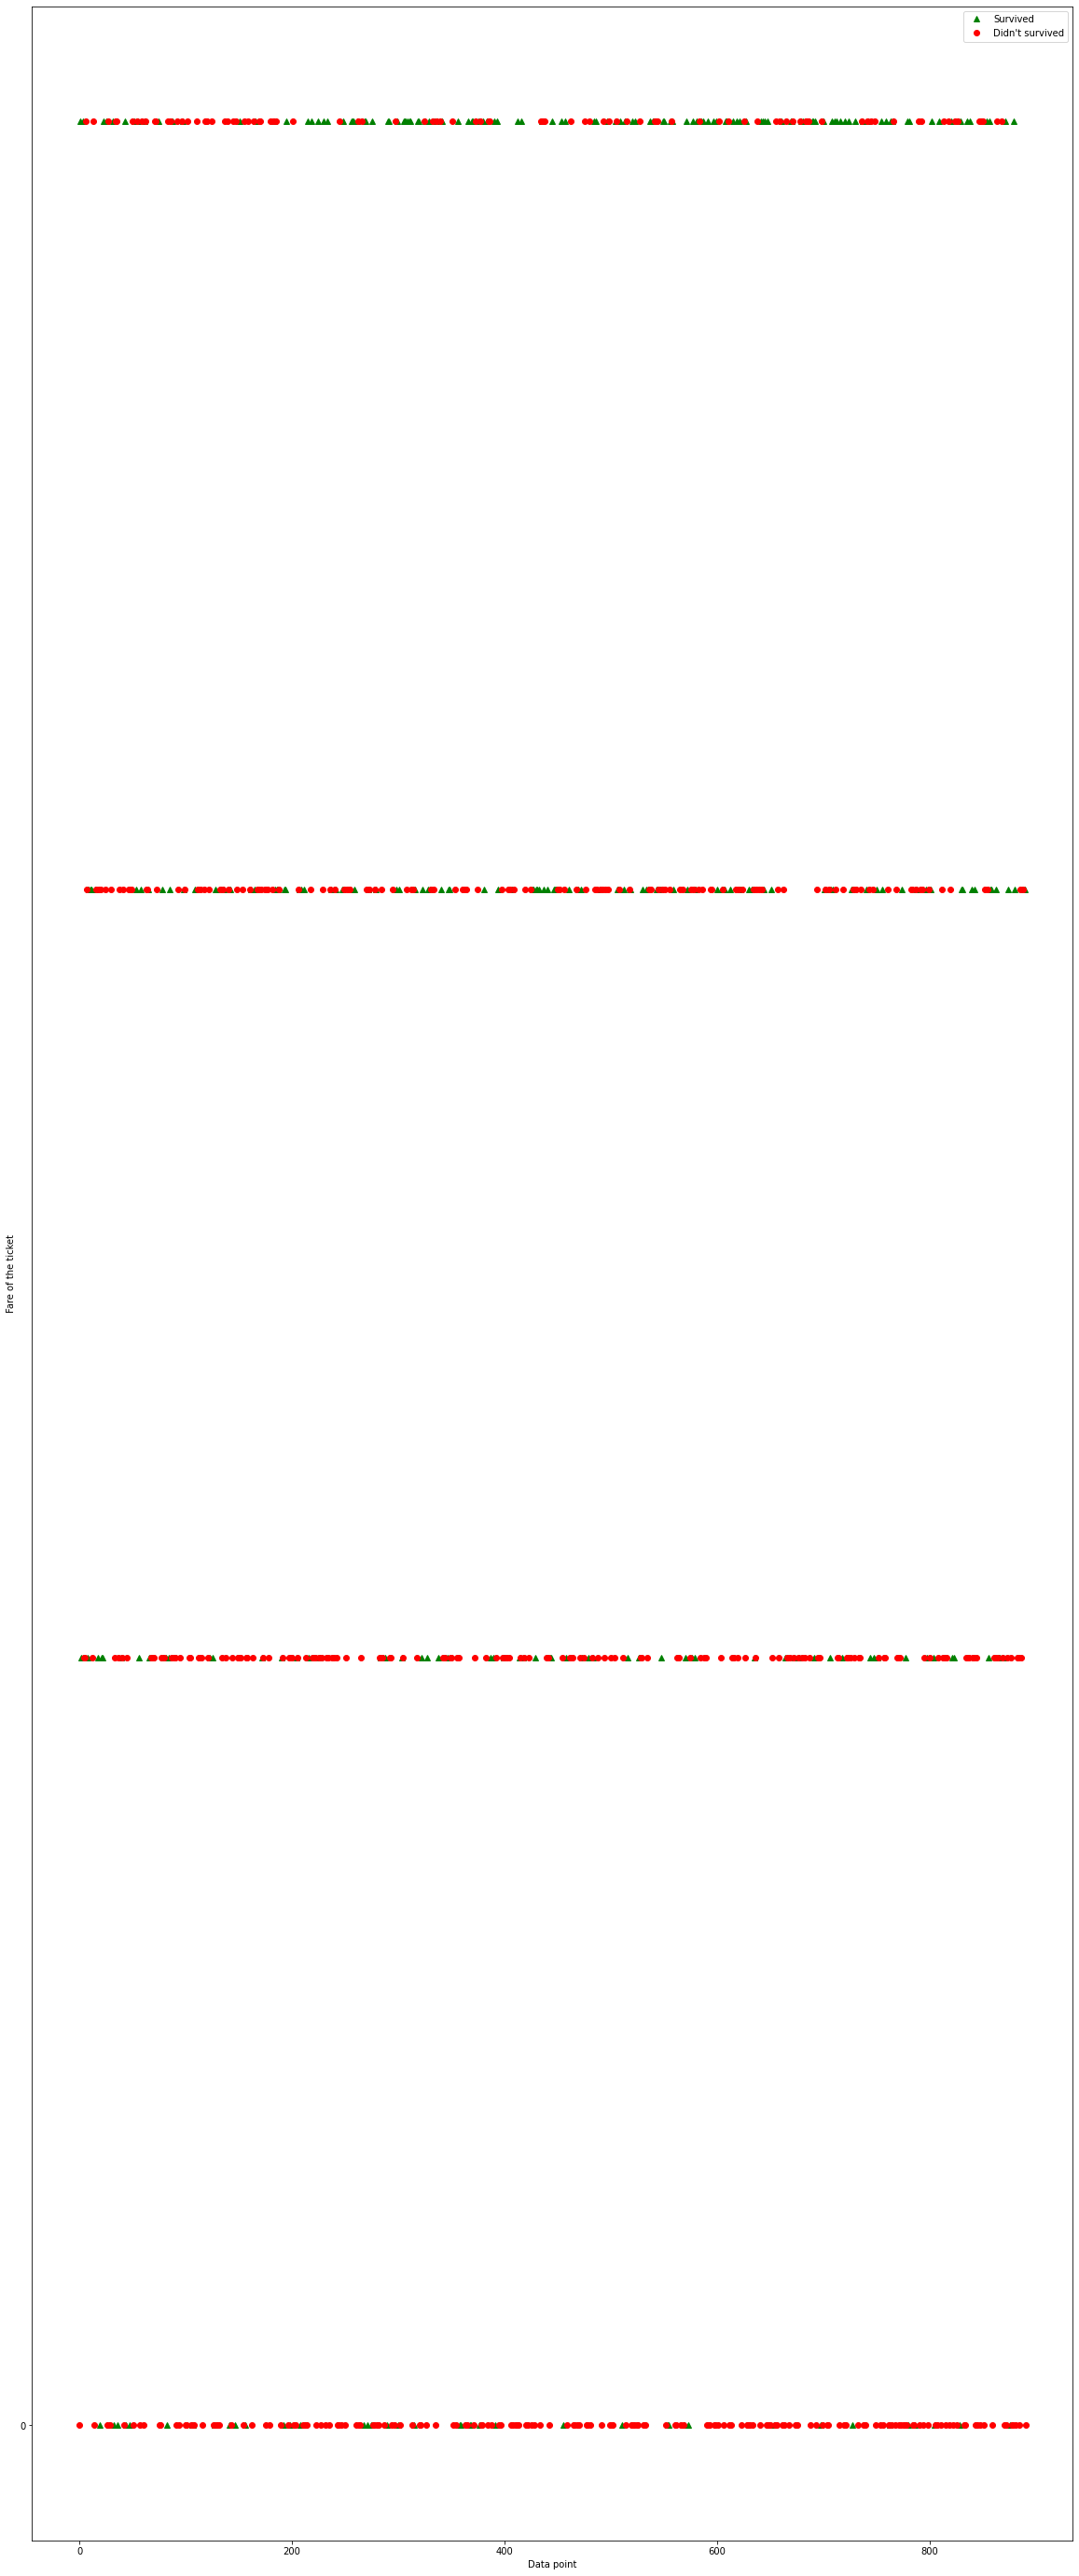

In [477]:
plt.figure(figsize=(20,50))
plt.plot(data[data.Survived == 1]['Fare'],'g^', label='Survived')
plt.plot(data[data.Survived == 0]['Fare'],'ro', label='Didn\'t survived')
plt.xlabel('Data point')
plt.ylabel('Fare of the ticket')
plt.yticks(np.arange(0, max(data.Fare), 10))
plt.legend()

In [478]:
data[data.Fare == max(data.Fare)]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,IsAlone
1,1,1,1,2,1,0,545,3,2,0
3,1,1,1,2,1,0,70,3,1,0
6,0,1,0,3,0,0,492,3,1,1
13,0,3,0,2,1,5,0,3,1,0
23,1,1,0,1,0,0,502,3,1,1
...,...,...,...,...,...,...,...,...,...,...
856,1,1,1,2,1,1,78,3,1,0
863,0,3,1,1,8,2,1,3,1,0
867,0,1,0,1,0,0,284,3,1,1
871,1,1,1,2,1,1,119,3,1,0


In [479]:
data.drop(columns=['Ticket'], inplace=True)

In [480]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,IsAlone
0,0,3,0,1,1,0,0,1,0
1,1,1,1,2,1,0,3,2,0
2,1,3,1,1,0,0,1,1,1
3,1,1,1,2,1,0,3,1,0
4,0,3,0,2,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,1,1,1
887,1,1,1,1,0,0,2,1,1
888,0,3,1,1,1,2,2,1,0
889,1,1,0,1,0,0,2,2,1


In [481]:
data_y = data['Survived']
data_X = data.drop(columns=['Survived'])

In [482]:
data_y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [483]:
shuffled_X, shuffled_y = shuffle(data_X, data_y)
X_train, X_test, y_train, y_test = train_test_split(shuffled_X, shuffled_y, test_size=0.2, random_state=10)

In [500]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
acc_log_train = round(logreg.score(X_train, y_train) * 100, 2)
acc_log_test = round(logreg.score(X_test, y_test) * 100, 2)
acc_log_train, acc_log_test

(80.76, 80.45)

In [501]:
svc = SVC()
svc.fit(X_train, y_train)
Y_pred = svc.predict(X_test)
acc_svc_train = round(svc.score(X_train, y_train) * 100, 2)
acc_svc_test = round(svc.score(X_test, y_test) * 100, 2)
acc_svc_train, acc_svc_test 

(82.87, 81.56)

In [502]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
Y_pred = knn.predict(X_test)
acc_knn_train = round(knn.score(X_train, y_train) * 100, 2)
acc_knn_test = round(knn.score(X_test, y_test) * 100, 2)
acc_knn_train, acc_knn_test

(87.36, 83.8)

In [503]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)
acc_gaussian_test = round(gaussian.score(X_test, y_test) * 100, 2)
acc_gaussian_train, acc_gaussian_test

(77.25, 74.86)

In [504]:
perceptron = Perceptron()
perceptron.fit(X_train, y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)
acc_perceptron_test = round(perceptron.score(X_test, y_test) * 100, 2)
acc_perceptron_train, acc_perceptron_test 

(52.67, 56.98)

In [505]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
acc_linear_svc_test = round(linear_svc.score(X_test, y_test) * 100, 2)
acc_linear_svc_train, acc_linear_svc_test

C:\Users\prabh\anaconda3\envs\boston_house_prices_prediction\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(80.62, 78.77)

In [506]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
Y_pred = sgd.predict(X_test)
acc_sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
acc_sgd_test = round(sgd.score(X_test, y_test) * 100, 2)
acc_sgd_train, acc_sgd_test

(79.63, 79.33)

In [507]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree_train = round(decision_tree.score(X_train, y_train) * 100, 2)
acc_decision_tree_test = round(decision_tree.score(X_test, y_test) * 100, 2)
acc_decision_tree_train, acc_decision_tree_test

(89.04, 79.89)

In [508]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, y_train)
acc_random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
acc_random_forest_test = round(random_forest.score(X_test, y_test) * 100, 2)
acc_random_forest_train, acc_random_forest_test

(89.04, 81.56)

In [512]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score_Train': [acc_svc_train, acc_knn_train, acc_log_train, 
              acc_random_forest_train, acc_gaussian_train, acc_perceptron_train, 
              acc_sgd_train, acc_linear_svc_train, acc_decision_tree_train],
    'Score_Test': [acc_svc_test, acc_knn_test, acc_log_test, 
              acc_random_forest_test, acc_gaussian_test, acc_perceptron_test, 
              acc_sgd_test, acc_linear_svc_test, acc_decision_tree_test]})
models

,Model,Score_Train,Score_Test
0,Support Vector Machines,82.87,81.56
1,KNN,87.36,83.80
2,Logistic Regression,80.76,80.45
3,Random Forest,89.04,81.56
4,Naive Bayes,77.25,74.86
5,Perceptron,52.67,56.98
6,Stochastic Gradient Decent,79.63,79.33
7,Linear SVC,80.62,78.77
8,Decision Tree,89.04,79.89
